In [1]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

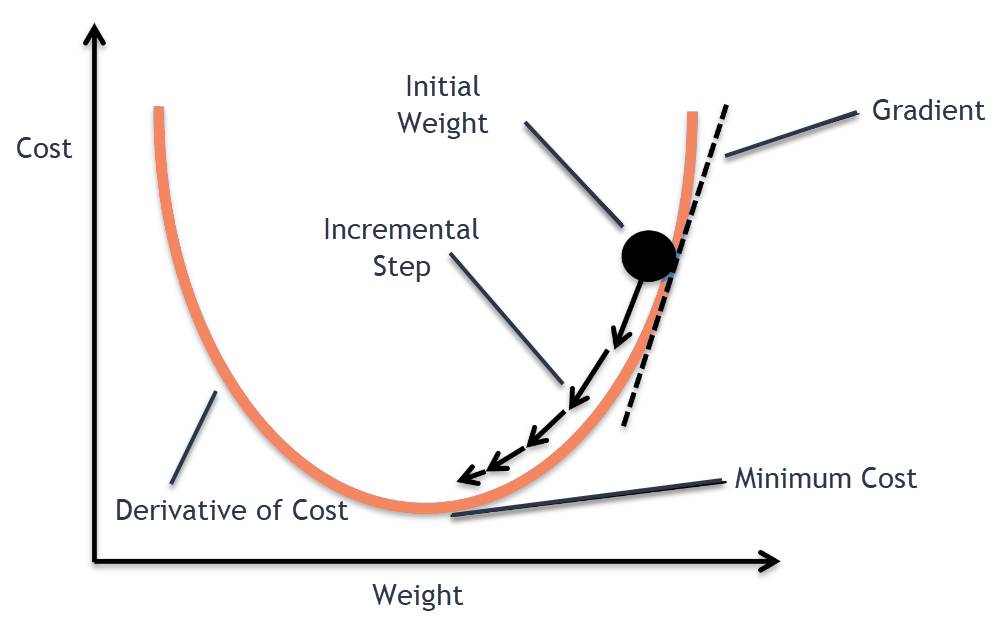

### **(1) 단항식 구현**

In [2]:
# Sample dataset 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise1 = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise1
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

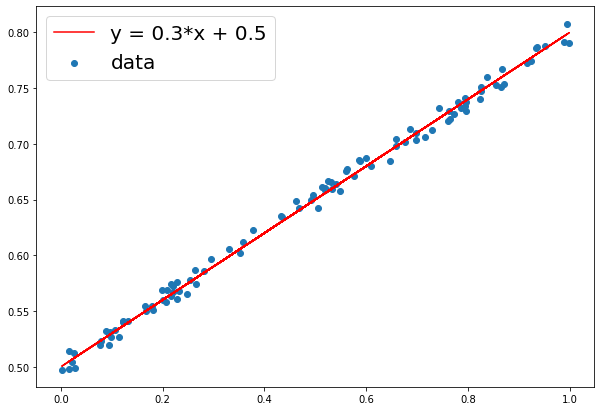

w: 0.3, b: 0.5


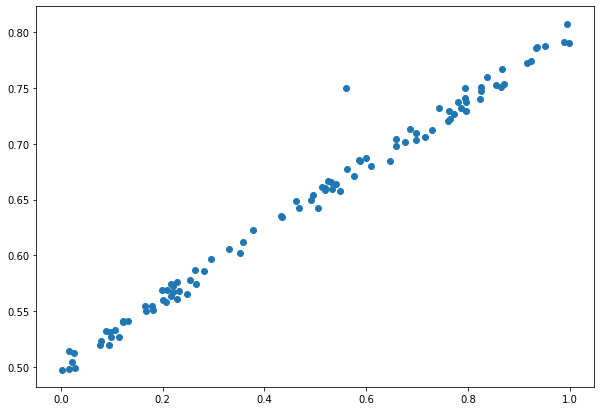

In [3]:
# 임의의 linear model 생성
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

# 임의로 2개의 outlier를 추가
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [4]:
# w, b 값에 대하여 random한 초기 값 설정
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [5]:
# 설정한 w, b 값에 대한 예측 값 계산
y_hat = w * x + b

## 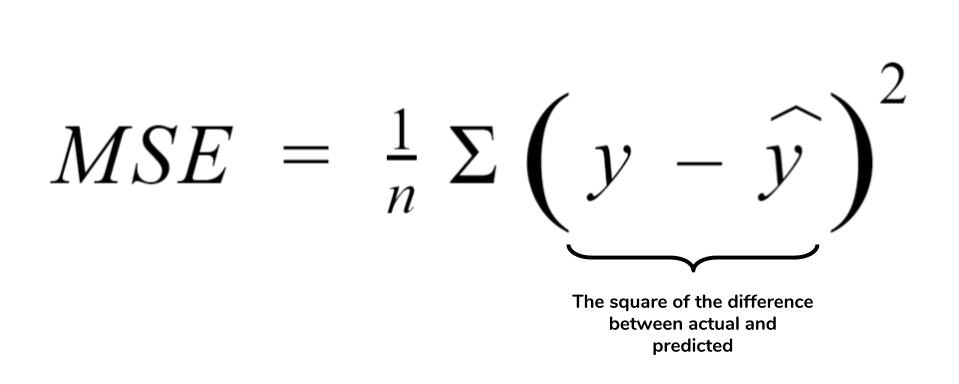

In [6]:
# 오차는 예측 값과 실제 값 간의 차이 제곱으로 정의 가능 (MSE 사용 시)
error = (y_hat - y) ** 2

In [7]:
# 최대 반복 횟수
num_epoch = 5000

# 학습율 (learning_rate)
learning_rate = 0.5

In [8]:
# Gradient Descent 구현

errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.74861, b = 0.32153 error = 0.03593
 5 w = 0.65834, b = 0.31701 error = 0.01225
10 w = 0.60002, b = 0.34674 error = 0.00863
15 w = 0.55130, b = 0.37190 error = 0.00609
20 w = 0.51049, b = 0.39298 error = 0.00430
25 w = 0.47630, b = 0.41063 error = 0.00305
30 w = 0.44765, b = 0.42543 error = 0.00217
35 w = 0.42366, b = 0.43782 error = 0.00155
40 w = 0.40355, b = 0.44820 error = 0.00112
45 w = 0.38671, b = 0.45690 error = 0.00082
50 w = 0.37261, b = 0.46418 error = 0.00060
------------------------------------------------------------
54 w = 0.4, b = 0.5 error = 0.00048


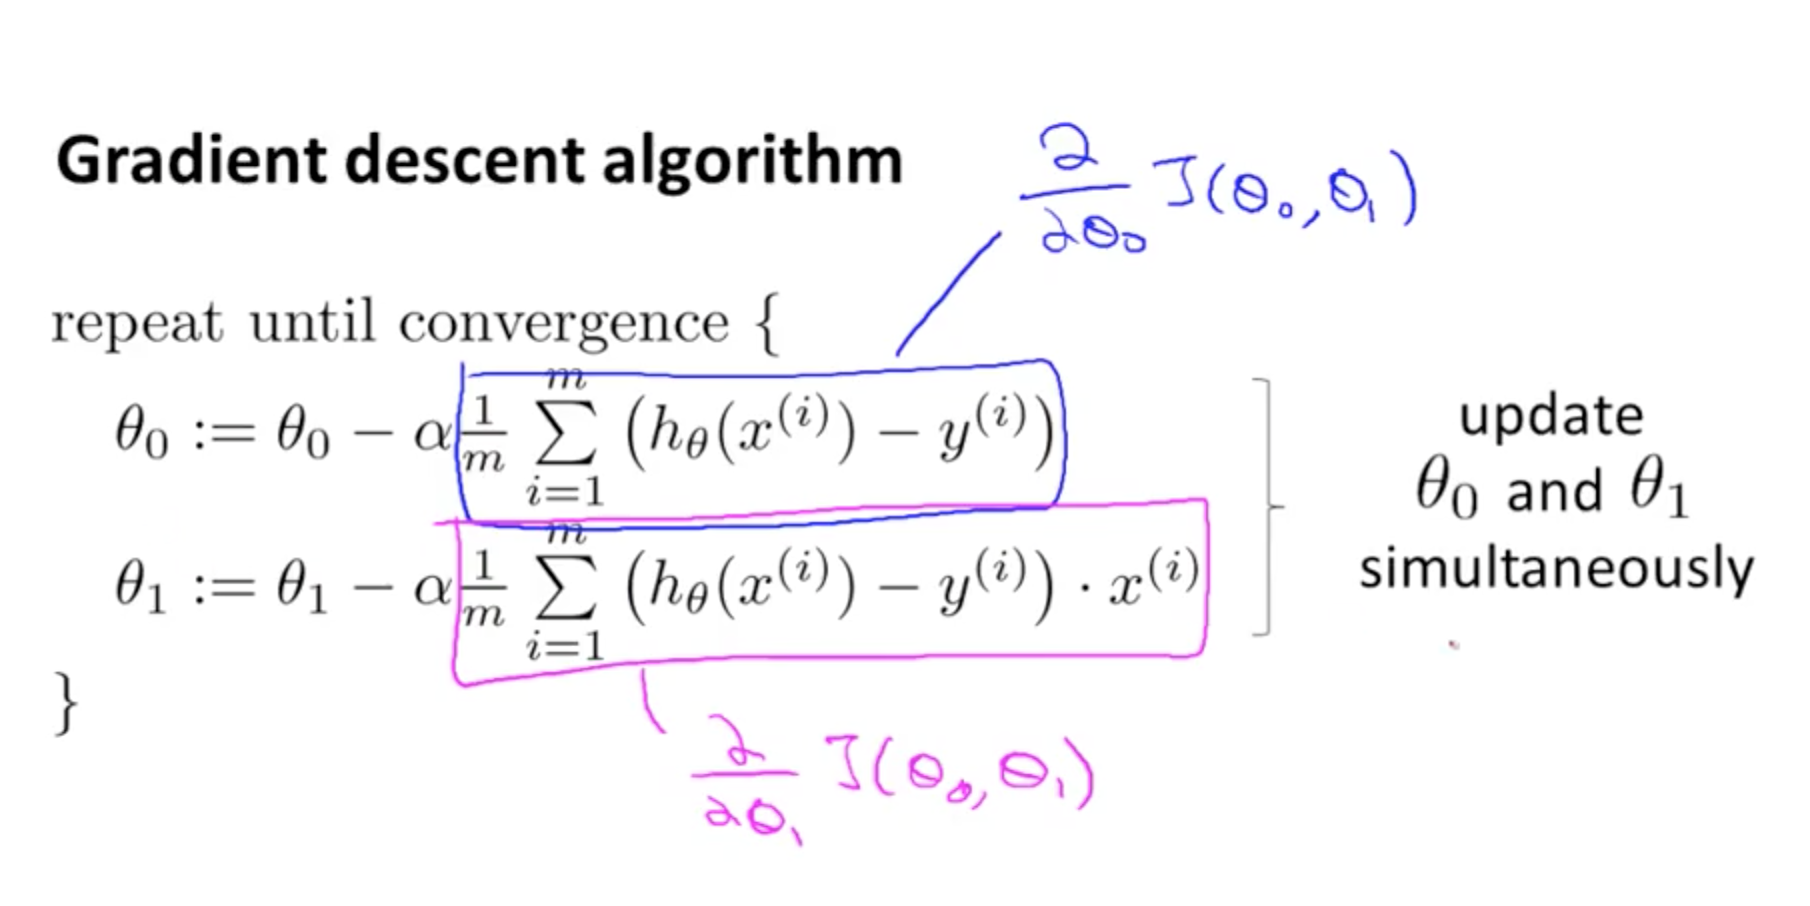

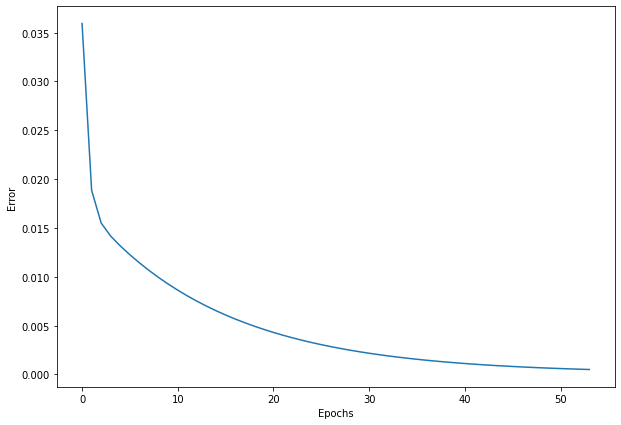

In [9]:
# Loss 변화 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### **(2) 다항식 구현**

In [10]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [11]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

In [12]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [13]:
# Gradient Descent 구현
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.68805, w2 = 0.74430, w3 = 0.50796, b = 0.77344 error = 0.18094
 5 w1 = 0.62888, w2 = 0.70490, w3 = 0.54552, b = 0.76849 error = 0.01251
10 w1 = 0.58715, w2 = 0.68062, w3 = 0.58338, b = 0.78340 error = 0.00913
15 w1 = 0.55099, w2 = 0.66009, w3 = 0.61293, b = 0.79782 error = 0.00676
20 w1 = 0.51965, w2 = 0.64256, w3 = 0.63592, b = 0.81158 error = 0.00507
25 w1 = 0.49247, w2 = 0.62745, w3 = 0.65376, b = 0.82461 error = 0.00384
30 w1 = 0.46887, w2 = 0.61432, w3 = 0.66755, b = 0.83684 error = 0.00295
35 w1 = 0.44837, w2 = 0.60282, w3 = 0.67814, b = 0.84827 error = 0.00228
40 w1 = 0.43053, w2 = 0.59267, w3 = 0.68624, b = 0.85888 error = 0.00178
45 w1 = 0.41500, w2 = 0.58367, w3 = 0.69237, b = 0.86870 error = 0.00140
50 w1 = 0.40146, w2 = 0.57564, w3 = 0.69696, b = 0.87776 error = 0.00111
55 w1 = 0.38964, w2 = 0.56846, w3 = 0.70036, b = 0.88610 error = 0.00088
60 w1 = 0.37930, w2 = 0.56200, w3 = 0.70282, b = 0.89375 error = 0.00070
65 w1 = 0.37024, w2 = 0.55619, w3 = 0.70456, b = 0.

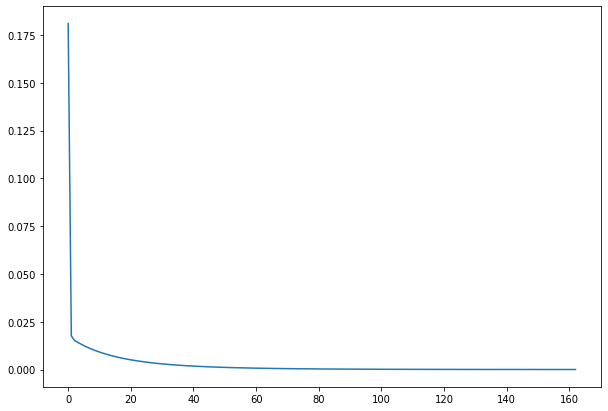

In [14]:
# loss 변화 시각화 
plt.figure(figsize=(10, 7))

plt.plot(errors)

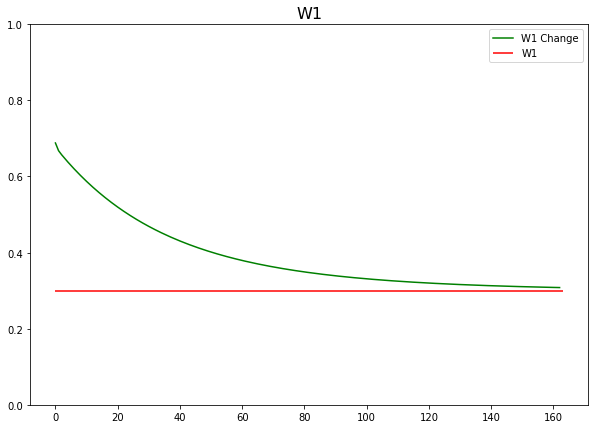

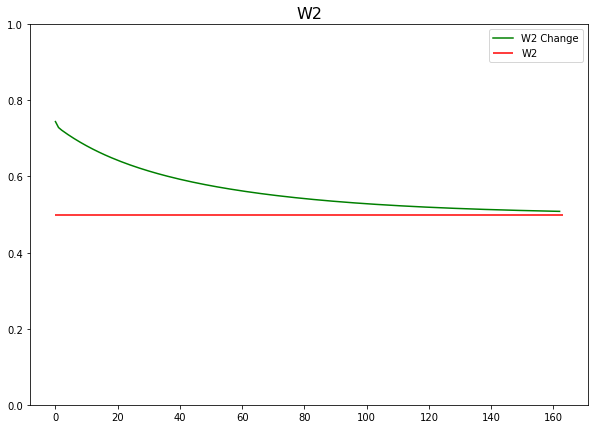

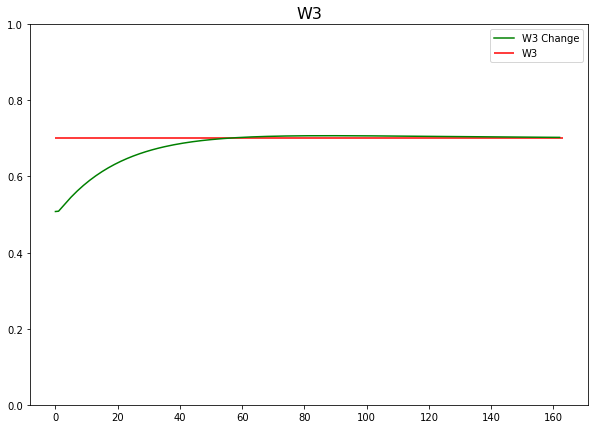

In [15]:
# 가중치(W1, W2, W3) 값들의 변화 시각화

plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()